In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

csv_url = 'https://raw.githubusercontent.com/eugeniogdiniz/PosTechDataScience_Fiap/main/05_Deep_Learning/arquivos/PEDE_PASSOS_DATASET_FIAP.csv'
df = pd.read_csv(csv_url, delimiter=';')
pd.set_option('display.max_columns', None)

# Analisando os dados 🔎

In [37]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

In [38]:
#Ajustando configurações para permitir a visualização de todas as colunas

pd.set_option('display.max_columns', None)

# Funções reutilizáveis 🤓

In [39]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [40]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [41]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [42]:
passos_magicos_22 = filter_columns(df, ['2020', '2021'])
passos_magicos_22 = cleaning_dataset(passos_magicos_22)
passos_magicos_22.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [43]:
passos_magicos_22.columns

Index(['NOME', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

In [44]:
passos_magicos_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG_2022              862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    float64

In [45]:
def dummie_int(df, list_columns):
    _df = df.copy()
    for columns in list_columns:
        _df[columns] = _df[columns].replace(['Sim', 'Não'], [1,0])
    return _df

In [46]:
passos_magicos_22

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.500,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.500,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,ALUNO-1342,2.0,K,2022.0,Não,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.000000,9.500000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
1342,ALUNO-1343,2.0,K,2018.0,Não,5.674644,763.0,141.0,11.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,2.000000,2.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.444443,5.0,Fase 4 (9º ano)
1345,ALUNO-1346,0.0,U,2022.0,Não,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano)
1347,ALUNO-1348,4.0,P,2018.0,Sim,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM)


In [47]:
passos_magicos_22 = dummie_int(passos_magicos_22, ['BOLSISTA_2022', 'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022'])
passos_magicos_22


C:\Users\AMD\AppData\Local\Temp\ipykernel_21536\29229358.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _df[columns] = _df[columns].replace(['Sim', 'Não'], [1,0])


,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,0,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,1,0,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,0,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,0,0,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,0,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,0,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.500,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,0,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.500,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,0,0,7.916670,5.0,Fase 2 (5º e 6º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,ALUNO-1342,2.0,K,2022.0,0,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.000000,9.500000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
1342,ALUNO-1343,2.0,K,2018.0,0,5.674644,763.0,141.0,11.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,2.000000,2.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.444443,5.0,Fase 4 (9º ano)
1345,ALUNO-1346,0.0,U,2022.0,0,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,0,1,9.083340,5.0,Fase 1 (4º ano)
1347,ALUNO-1348,4.0,P,2018.0,1,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,0,0,5.833328,5.0,Fase 5 (1º EM)


In [48]:
#Ajustando colunas (transformando em dummy)

passos_magicos_22['BOLSISTA_2022'] = passos_magicos_22['BOLSISTA_2022'].replace(['Sim', 'Não'], [1,0])
passos_magicos_22['INDICADO_BOLSA_2022'] = passos_magicos_22['INDICADO_BOLSA_2022'].replace(['Sim', 'Não'], [1,0])
passos_magicos_22['PONTO_VIRADA_2022'] = passos_magicos_22['PONTO_VIRADA_2022'].replace(['Sim', 'Não'], [1,0])


In [49]:
passos_magicos_22.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,0,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,1,0,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,0,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,0,0,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,0,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,0,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,0,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,0,0,7.916670,5.0,Fase 2 (5º e 6º ano)


In [50]:
passos_magicos_22['PEDRA_2022'].unique()

array(['Ametista', 'Quartzo', 'Topázio', 'Ágata'], dtype=object)

In [51]:
passos_magicos_22['DESTAQUE_IEG_2022'].unique()

array(['Destaque: A sua boa entrega das lições de casa.',
       'Melhorar: Melhorar a sua entrega de lições de casa.'],
      dtype=object)

In [52]:
passos_magicos_22['DESTAQUE_IDA_2022'].unique()

array(['Destaque: As suas boas notas na Passos Mágicos.',
       'Melhorar: Empenhar-se mais nas aulas e avaliações.'], dtype=object)

In [53]:
passos_magicos_22['DESTAQUE_IPV_2022'].unique()

array(['Destaque: A sua boa integração aos Princípios Passos Mágicos.',
       'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.'],
      dtype=object)

In [54]:
passos_magicos_22['REC_AVA_1_2022'].unique()

array(['Mantido na Fase + Bolsa', 'Promovido de Fase',
       'Mantido na Fase atual', 'Promovido de Fase + Bolsa',
       'Não avaliado', 'Alocado em Fase anterior'], dtype=object)

In [55]:
passos_magicos_22['REC_AVA_2_2022'].unique()

array(['Mantido na Fase atual', 'Promovido de Fase', 'Não avaliado',
       'Promovido de Fase + Bolsa', 'Mantido na Fase + Bolsa'],
      dtype=object)

In [56]:
passos_magicos_22['REC_AVA_3_2022'].unique()

array([nan, 'Promovido de Fase', 'Mantido na Fase atual',
       'Promovido de Fase + Bolsa', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior'], dtype=object)

In [57]:
passos_magicos_22['REC_AVA_4_2022'].unique()

array([nan, 'Promovido de Fase', 'Promovido de Fase + Bolsa',
       'Mantido na Fase atual', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior'], dtype=object)

In [58]:
passos_magicos_22['NIVEL_IDEAL_2022'].unique()

array(['Fase 2 (5º e 6º ano)', 'Fase 3 (7º e 8º ano)', 'Fase 6 (2º EM)',
       'ALFA  (2º e 3º ano)', 'Fase 1 (4º ano)', 'Fase 4 (9º ano)',
       'Fase 8 (Universitários)', 'Fase 5 (1º EM)', 'Fase 7 (3º EM)'],
      dtype=object)

In [59]:
drop_columns = ['DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022', 'REC_AVA_1_2022',
                'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022', 'NIVEL_IDEAL_2022', 'NOME', 
                'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'PEDRA_2022',
                'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'QTD_AVAL_2022', 
                'BOLSISTA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022','NOTA_ING_2022']

In [60]:
passos_magicos_22.drop(columns=drop_columns, inplace=True)


In [61]:
passos_magicos_22.head()

,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,IPP_2022,INDICADO_BOLSA_2022
1,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,5.625000,1
3,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,6.250000,0
4,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,6.458333,0
5,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,6.250000,0
6,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,5.937500,0


In [76]:
# prompt: FAZER UM MODELO DO TIPO RANDOM FOREST PARA A BASE PASSOSMAGICOS_2022 USANDO A VARIAVEL BOLSISTA_2022 COMO TARGET, REMOVENDO AS LINHAS NAN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove as linhas com valores NaN
passos_magicos_22_clean = passos_magicos_22.dropna()

# Define as variáveis preditoras (X) e a variável alvo (y)
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=21)

# Cria o modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)


Acurácia do modelo: 0.8837209302325582

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       144
           1       0.75      0.43      0.55        28

    accuracy                           0.88       172
   macro avg       0.82      0.70      0.74       172
weighted avg       0.87      0.88      0.87       172



In [77]:
#Ajuste de Hiperparâmetros:
#Explore diferentes hiperparâmetros para o Random Forest para possivelmente melhorar o desempenho.

from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [65]:
import joblib

In [79]:
best_model = grid_search.best_estimator_

# Faz previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)

# Salva o modelo treinado
joblib.dump(best_model, 'random_forest_model.pkl')

Acurácia do modelo: 0.877906976744186

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       144
           1       0.77      0.36      0.49        28

    accuracy                           0.88       172
   macro avg       0.83      0.67      0.71       172
weighted avg       0.87      0.88      0.86       172



['random_forest_model.pkl']

In [67]:
#Balanceamento das Classes:
#Se houver um desequilíbrio significativo nas classes, técnicas como sobremostragem (SMOTE) ou subsampling podem ser utilizadas para melhorar o desempenho na classe minoritária.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
# prompt:  FAZER UM MODELO DO TIPO xgboost PARA A BASE PASSOSMAGICOS_2022 USANDO A VARIAVEL BOLSISTA_2022 COMO TARGET, REMOVENDO AS LINHAS NAN

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Remove as linhas com valores NaN
passos_magicos_22_clean = passos_magicos_22.dropna()

# Define as variáveis preditoras (X) e a variável alvo (y)
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Cria o modelo XGBoost
model = xgb.XGBClassifier(random_state=21)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

import joblib

# Treine seu modelo (best_model no caso de tuning)
best_model.fit(X_train, y_train)

# Salve o modelo
joblib.dump(best_model, 'modelo_xgboost.pkl')

Acurácia do modelo: 0.872093023255814

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       144
           1       0.65      0.46      0.54        28

    accuracy                           0.87       172
   macro avg       0.78      0.71      0.73       172
weighted avg       0.86      0.87      0.86       172

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [83]:
# prompt:  FAZER UM MODELO DO TIPO xgboost PARA A BASE PASSOSMAGICOS_2022 USANDO A VARIAVEL BOLSISTA_2022 COMO TARGET, REMOVENDO AS LINHAS NAN

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Remove as linhas com valores NaN
passos_magicos_22_clean = passos_magicos_22.dropna()

# Define as variáveis preditoras (X) e a variável alvo (y)
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Cria o modelo XGBoost
model = xgb.XGBClassifier(random_state=21)

# Aplica SMOTE no conjunto de treino
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treina o modelo com dados balanceados
model.fit(X_train_resampled, y_train_resampled)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],  # Experimente diferentes valores
    'min_child_weight': [1, 5, 10],  # Experimente diferentes valores
    'gamma': [0, 0.1, 0.2]  # Experimente diferentes valores
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

import joblib

# Treine seu modelo (best_model no caso de tuning)
best_model.fit(X_train, y_train)

# Salve o modelo
joblib.dump(best_model, 'modelo_xgboost.pkl')

Acurácia do modelo: 0.8546511627906976

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       144
           1       0.56      0.50      0.53        28

    accuracy                           0.85       172
   macro avg       0.73      0.71      0.72       172
weighted avg       0.85      0.85      0.85       172

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


['modelo_xgboost.pkl']

AUC: 0.8658234126984127


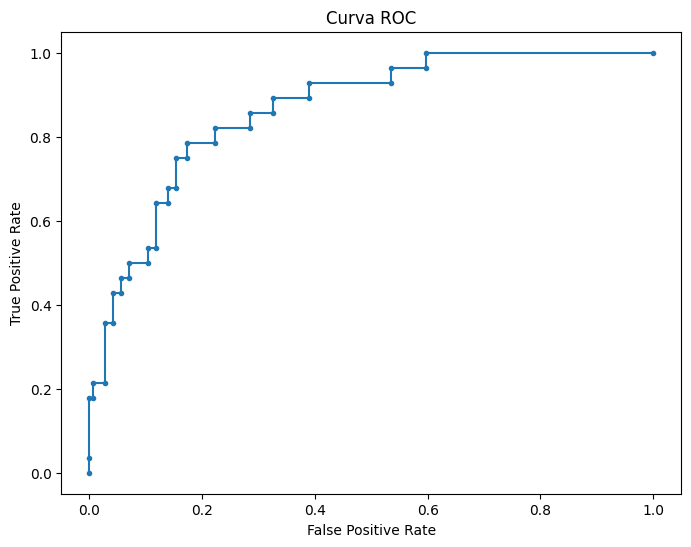

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve

# Faz previsões de probabilidade
y_proba = model.predict_proba(X_test)[:, 1]

# Calcula a AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC:", roc_auc)

# Plota a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score

# Avalia o modelo usando validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("F1-Score médio com validação cruzada:", cv_scores.mean())

F1-Score médio com validação cruzada: 0.4188881238113975


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Acurácia do melhor modelo: 0.877906976744186

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       144
           1       0.64      0.57      0.60        28

    accuracy                           0.88       172
   macro avg       0.78      0.75      0.77       172
weighted avg       0.87      0.88      0.88       172

F1-Score médio com validação cruzada: 0.41519834170996966
AUC: 0.8792162698412698


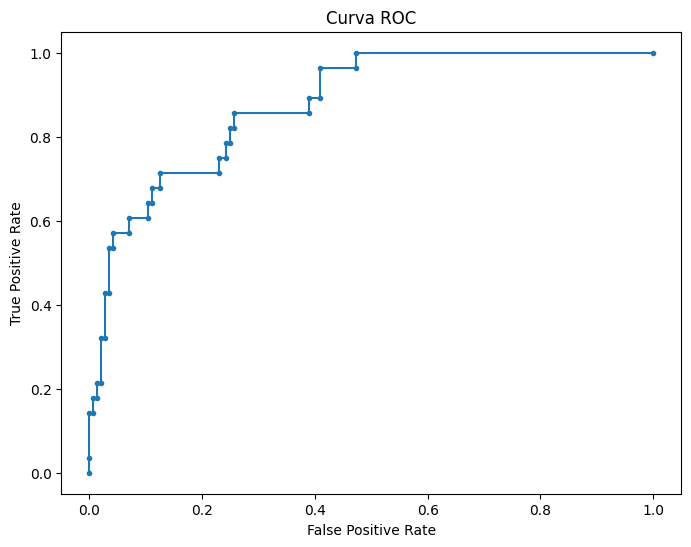

In [87]:
# Remove as linhas com valores NaN
passos_magicos_22_clean = passos_magicos_22.dropna()

# Define as variáveis preditoras (X) e a variável alvo (y)
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Aplicar SMOTE para lidar com o desbalanceamento de classes
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Parâmetros para Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],  # Ajustando o peso das classes
    'min_child_weight': [1, 5, 10],  # Ajustando o peso dos filhos
    'gamma': [0, 0.1, 0.2]  # Ajustando o parâmetro gamma
}

# Grid Search para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=21),
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

# Avaliar o modelo com o melhor ajuste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do melhor modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)

# Avaliação com validação cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print("F1-Score médio com validação cruzada:", cv_scores.mean())

# Avaliação adicional com AUC e curva ROC
y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

In [91]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=21),
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Número de combinações a testar
                                   cv=3,
                                   scoring='f1',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=21)

random_search.fit(X_train_resampled, y_train_resampled)
best_model_random = random_search.best_estimator_

print("Melhores parâmetros encontrados:", random_search.best_params_)

from sklearn.metrics import classification_report, accuracy_score

# Melhores parâmetros encontrados
best_params = random_search.best_params_

# Cria o modelo XGBoost com os melhores parâmetros
best_model = xgb.XGBClassifier(**best_params, random_state=21)

# Treina o modelo com os dados de treinamento
best_model.fit(X_train_resampled, y_train_resampled)

# Faz previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avalia o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do melhor modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)

from sklearn.model_selection import cross_val_score

# Avalia o modelo usando validação cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print("F1-Score médio com validação cruzada:", cv_scores.mean())


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Melhores parâmetros encontrados: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Acurácia do melhor modelo: 0.8662790697674418

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       144
           1       0.59      0.57      0.58        28

    accuracy                           0.87       172
   macro avg       0.75      0.75      0.75       172
weighted avg       0.86      0.87      0.87       172

F1-Score médio com validação cruzada: 0.43638714599245054


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       144
           1       0.57      0.61      0.59        28

    accuracy                           0.86       172
   macro avg       0.74      0.76      0.75       172
weighted avg       0.86      0.86      0.86       172

Matriz de Confusão:
 [[131  13]
 [ 11  17]]


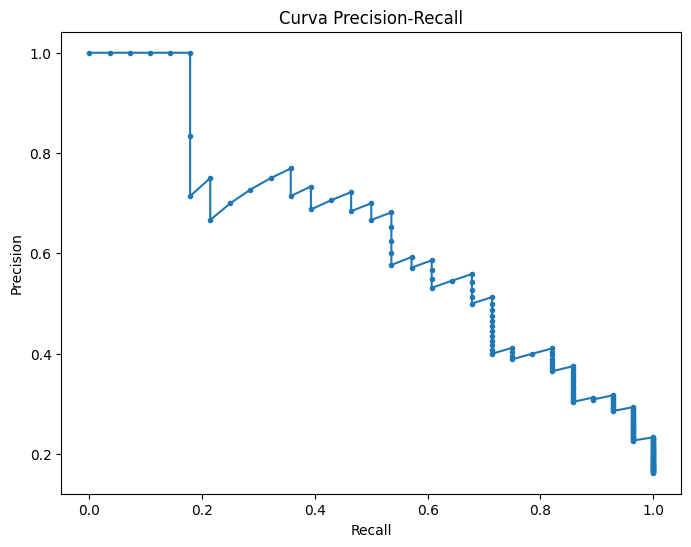

In [94]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Dados e divisão em treino e teste
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Reamostragem com SMOTE
smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajuste de pesos de classe
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

# Cria o modelo XGBoost com pesos das classes
model = xgb.XGBClassifier(scale_pos_weight=weights[1], random_state=21)

# Treina o modelo com os dados de treinamento reamostrados
model.fit(X_resampled, y_resampled)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       144
           1       0.57      0.61      0.59        28

    accuracy                           0.86       172
   macro avg       0.74      0.76      0.75       172
weighted avg       0.86      0.86      0.86       172

Matriz de Confusão:
 [[131  13]
 [ 11  17]]


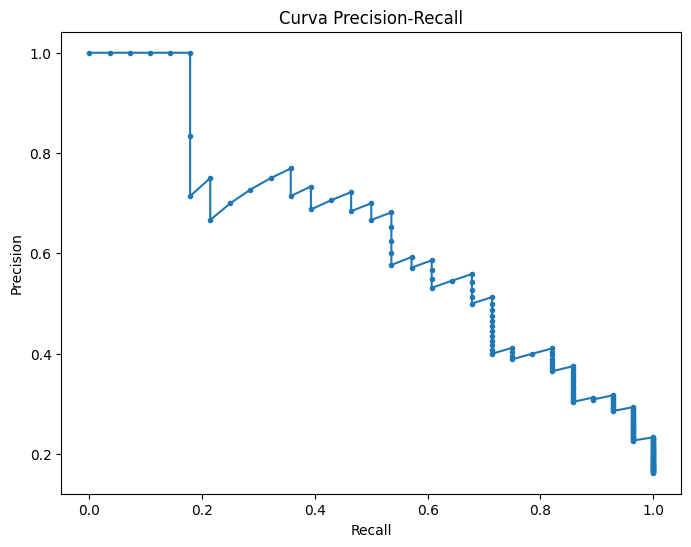

In [101]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import pandas as pd
import numpy as np

# Supondo que passos_magicos_22 seja seu DataFrame original
# Exemplo de dados
# passos_magicos_22 = pd.read_csv('caminho_para_seu_arquivo.csv')

# Remove as linhas com valores NaN
passos_magicos_22_clean = passos_magicos_22.dropna()

# Define as variáveis preditoras (X) e a variável alvo (y)
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Cria uma instância do SMOTE
smote = SMOTE(random_state=21)

# Aplica o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajuste de pesos de classe
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

# Cria o modelo XGBoost com pesos das classes ajustados
model = xgb.XGBClassifier(scale_pos_weight=weights[1], random_state=21)

# Treina o modelo com os dados de treinamento reamostrados
model.fit(X_resampled, y_resampled)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia o modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()


In [102]:
#1. Random Search

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Carregar os dados e preparar o conjunto de treinamento
passos_magicos_22_clean = passos_magicos_22.dropna()
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Definir o espaço de hiperparâmetros
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 15),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Criar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=3,
                                   scoring='f1',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

random_search.fit(X_train, y_train)
best_model_random = random_search.best_estimator_

# Avaliar o modelo
y_pred = best_model_random.predict(X_test)
print("Acurácia do melhor modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Acurácia do melhor modelo: 0.872093023255814

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       144
           1       0.65      0.46      0.54        28

    accuracy                           0.87       172
   macro avg       0.78      0.71      0.73       172
weighted avg       0.86      0.87      0.86       172



In [105]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [106]:
#2. Bayesian Optimization

from skopt import BayesSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Carregar os dados e preparar o conjunto de treinamento
passos_magicos_22_clean = passos_magicos_22.dropna()
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Definir o espaço de hiperparâmetros
param_space = {
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.2, 'uniform'),
    'max_depth': (3, 15),
    'subsample': (0.7, 1.0, 'uniform'),
    'colsample_bytree': (0.7, 1.0, 'uniform')
}

# Criar o BayesSearchCV
bayes_search = BayesSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                             search_spaces=param_space,
                             n_iter=50,
                             cv=3,
                             scoring='f1',
                             n_jobs=-1,
                             verbose=2,
                             random_state=42)

bayes_search.fit(X_train, y_train)
best_model_bayes = bayes_search.best_estimator_

# Avaliar o modelo
y_pred = best_model_bayes.predict(X_test)
print("Acurácia do melhor modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [108]:
pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 16.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Carregar os dados e preparar o conjunto de treinamento
passos_magicos_22_clean = passos_magicos_22.dropna()
X = passos_magicos_22_clean.drop('INDICADO_BOLSA_2022', axis=1)
y = passos_magicos_22_clean['INDICADO_BOLSA_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

def objective(params):
    model = xgb.XGBClassifier(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=21
    )
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1').mean()
    return -score

space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500, 50)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 15, 1)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Recriar o modelo com os melhores parâmetros
best_model = xgb.XGBClassifier(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    max_depth=int(best['max_depth']),
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    random_state=21
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Acurácia do melhor modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


100%|██████████| 50/50 [00:16<00:00,  3.07trial/s, best loss: -0.4222708219427738]
Acurácia do melhor modelo: 0.877906976744186

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       144
           1       0.71      0.43      0.53        28

    accuracy                           0.88       172
   macro avg       0.80      0.70      0.73       172
weighted avg       0.87      0.88      0.87       172

